In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score


# DESCRIPTIVE ANALYTICS

In [43]:
df = pd.read_csv('healthinsurance.csv')
df.head(50)

age     sex   bmi  children  smoker     region  bloodpressure  diabetes  \
0    54  female  47.4         0       0  southeast             90         1   
1    45    male  57.0         0       0  southeast             66         1   
2    52    male  34.5         3       0  northwest             70         0   
3    31  female  38.1         1       0  northeast             80         1   
4    33  female  59.0         0       0  northwest             50         1   
5    60    male  32.8         0       1  southwest             75         0   
6    28    male  36.4         1       0  southwest             78         1   
7    64    male  62.0         2       1  southeast             90         1   
8    59    male  41.1         1       1  southeast             50         1   
9    44  female  38.1         0       1  southeast             72         1   
10   63  female  37.7         0       0  southwest             72         1   
11   57    male  42.1         1       0  southeast             60         1   
12   60    male  40.9         0       0  southeast             74         1   
13   54    male  40.6         3       0  northeast             76         1   
14   61  female  49.0         1       1  northeast             72         1   
15   60    male  39.9         0       0  southwest             72         1   
16   64  female  33.8         1       0  southwest             86         1   
17   59  female  36.8         1       0  northeast             56         1   
18   58    male  37.0         2       0  northwest             50         1   
19   51    male  42.9         2       0  southeast             60         1   
20   61    male  36.3         1       0  southwest             88         1   
21   63  female  32.2         2       0  southwest             84         1   
22   64  female  31.3         2       0  southwest             82         1   
23   52    male  41.8         2       1  southeast             66         1   
24   63    male  35.1         0       1  southeast             85         1   
25   64    male  33.9         0       0  southeast             88         1   
26   62    male  30.9         3       0  northwest              0         1   
27   53  female  36.9         3       0  northwest             78         1   
28   61    male  35.9         0       0  southeast             68         1   
29   51  female  37.1         3       0  northeast             92         1   
30   44  female  43.9         2       0  southeast             82         1   
31   46    male  42.4         3       1  southeast             74         1   
32   60    male  31.4         3       0  northwest             60         1   
33   37  female  47.6         2       1  southwest             78         1   
34   43  female  46.2         0       0  southeast            110         1   
35   62    male  32.0         0       0  northeast             58         1   
36   48    male  40.6         2       0  northwest             66         1   
37   60  female  32.5         0       0  southeast             72         1   
38   51  female  35.0         2       0  northeast             86         1   
39   29    male  35.5         2       0  southwest             74         1   
40   22    male  52.6         1       1  southeast             62         1   
41   55  female  35.2         0       1  southeast             80         1   
42   51  female  38.1         0       1  southeast              0         1   
43   54    male  34.2         2       0  southeast             80         1   
44   47    male  38.9         2       0  southeast             30         1   
45   34  female  30.2         1       0  northwest             66         1   
46   56    male  33.6         0       0  northwest             56         1   
47   42  female  40.4         2       0  southeast             70         1   
48   56    male  31.8         2       0  southeast             82         1   
49   36    male  41.9         3       0  northeast    

In [44]:
df.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker             int64
region            object
bloodpressure      int64
diabetes           int64
regular_ex         int64
claim            float64
dtype: object

## 5 Point summary

In [45]:
df.describe().transpose()

count          mean           std      min        25%  \
age            1338.0     39.207025     14.049960    18.00    27.0000   
bmi            1338.0     30.808281      6.282207    16.00    26.3000   
children       1338.0      1.094918      1.205493     0.00     0.0000   
smoker         1338.0      0.144245      0.351469     0.00     0.0000   
bloodpressure  1338.0     68.977578     19.327770     0.00    64.0000   
diabetes       1338.0      0.687593      0.463648     0.00     0.0000   
regular_ex     1338.0      0.319133      0.466315     0.00     0.0000   
claim          1338.0  13270.422414  12110.011240  1121.87  4740.2875   

                   50%        75%       max  
age              39.00     51.000     64.00  
bmi              30.50     34.800     62.00  
children          1.00      2.000      5.00  
smoker            0.00      0.000      1.00  
bloodpressure    72.00     80.000    122.00  
diabetes          1.00      1.000      1.00  
regular_ex        0.00      1.000      1.00  
claim          9382.03  16639.915  63770.43

# MISSING VALUES

In [46]:
## Remove rows with bloodpressure = 0, as this can introduce bias in our model. There are 62 such rows
df_copy = df
df_copy['bloodpressure'].replace(0,np.nan,inplace=True)
df_copy = df_copy.dropna()

In [47]:
df_copy.bloodpressure.isna().sum()

0

# BIVARIATE ANALYSIS

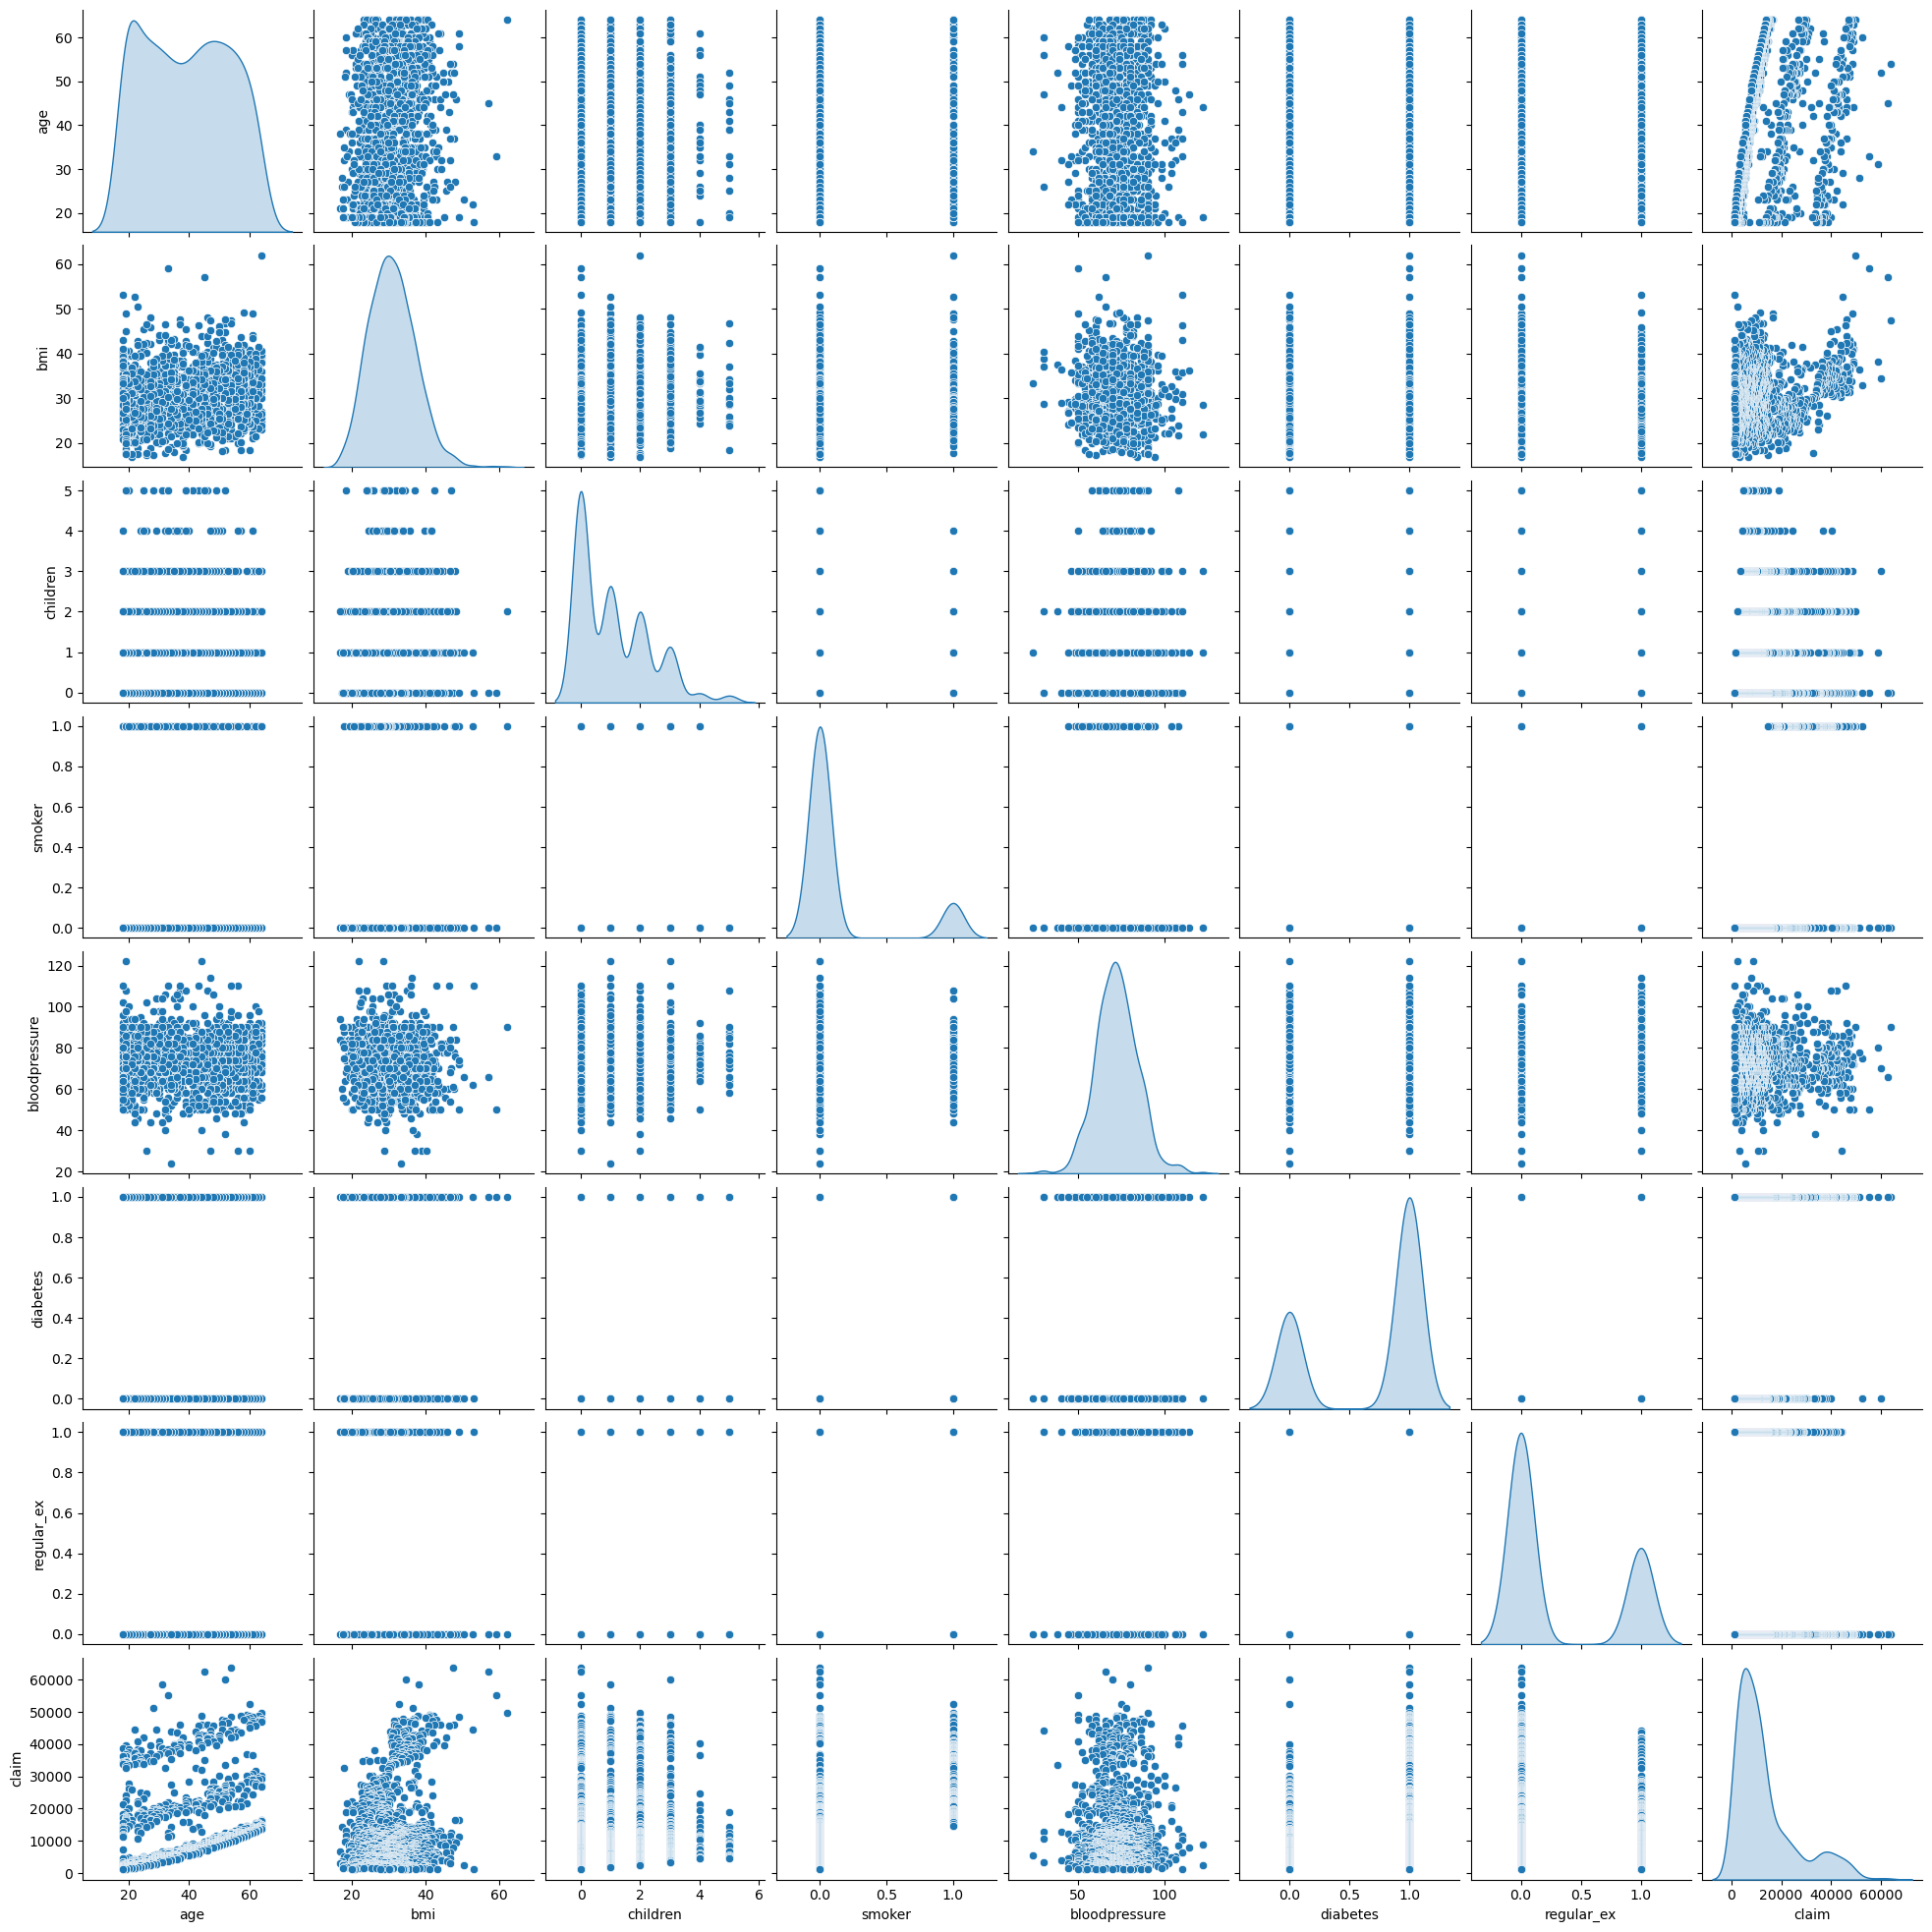

In [48]:
sns.pairplot(df_copy,diag_kind='kde')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'bmi'),
  Text(2, 0, 'children'),
  Text(3, 0, 'smoker'),
  Text(4, 0, 'bloodpressure'),
  Text(5, 0, 'diabetes'),
  Text(6, 0, 'regular_ex')])

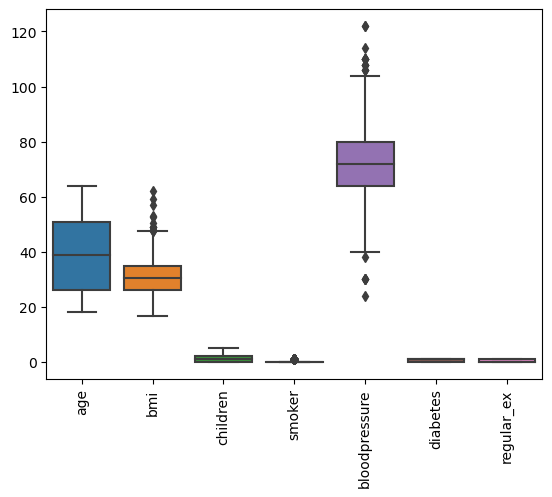

In [49]:
sns.boxplot(df_copy[df_copy.columns[:-1]])
plt.xticks(rotation=90)

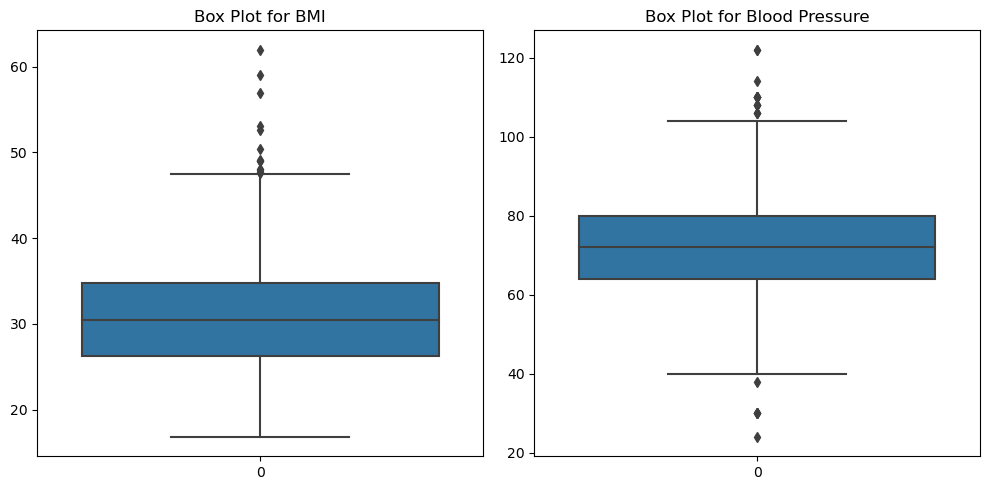

In [50]:
## Boxplots for BMI and Blood Pressure

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(data=df_copy['bmi'], ax=axes[0])
axes[0].set_title('Box Plot for BMI')

sns.boxplot(data=df['bloodpressure'], ax=axes[1])
axes[1].set_title('Box Plot for Blood Pressure')

plt.tight_layout()
plt.show()

# HANDLING OUTLIERS

In [51]:
columns_to_cap = ['bmi', 'bloodpressure']  

# Define a function to cap/winsorize outliers
def cap_outliers(data, column, lower_percentile=1, upper_percentile=99):
    lower_bound = data[column].quantile(lower_percentile / 100)
    upper_bound = data[column].quantile(upper_percentile / 100)
    capped_column = data[column].clip(lower_bound, upper_bound)
    return capped_column

for col in columns_to_cap:
    df_copy[col] = cap_outliers(df_copy, col)

C:\Users\tejas\AppData\Local\Temp\ipykernel_15568\148450803.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col] = cap_outliers(df_copy, col)
C:\Users\tejas\AppData\Local\Temp\ipykernel_15568\148450803.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col] = cap_outliers(df_copy, col)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'bmi'),
  Text(2, 0, 'children'),
  Text(3, 0, 'smoker'),
  Text(4, 0, 'bloodpressure'),
  Text(5, 0, 'diabetes'),
  Text(6, 0, 'regular_ex')])

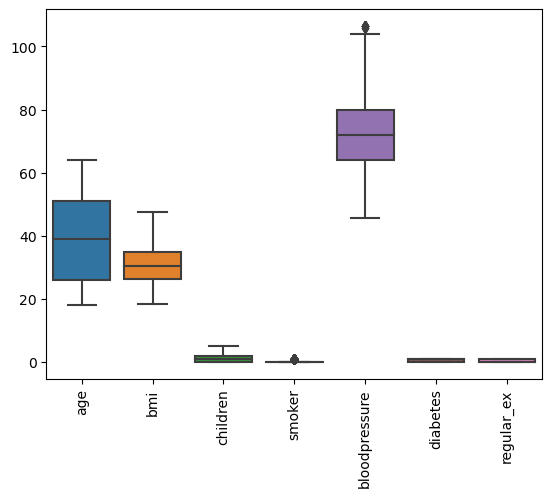

In [52]:
## Outliers reduced
sns.boxplot(df_copy[df_copy.columns[:-1]])
plt.xticks(rotation=90)

# TRANSFORMATION OF TARGET COLUMN

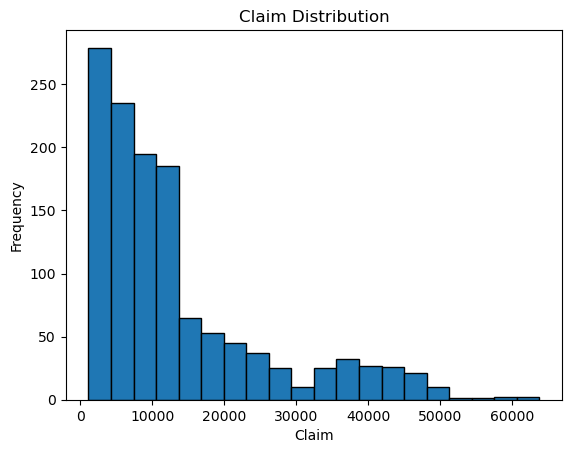

In [53]:

plt.hist(df_copy.claim, bins=20, edgecolor='black')
plt.title("Claim Distribution")
plt.xlabel("Claim")
plt.ylabel("Frequency")
plt.show()


C:\Users\tejas\AppData\Local\Temp\ipykernel_15568\565050270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['log_claim'] = np.log(df_copy['claim'])


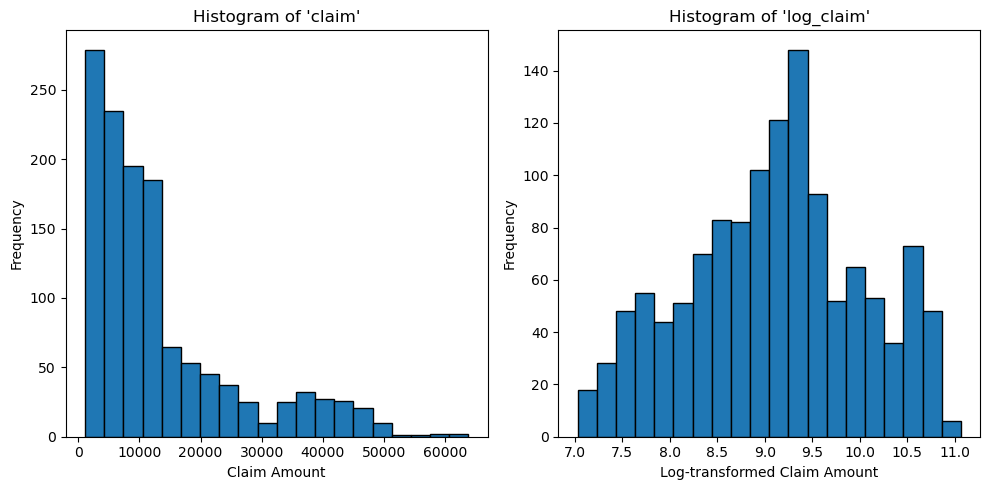

In [54]:
df_copy['log_claim'] = np.log(df_copy['claim'])
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df_copy['claim'], bins=20, edgecolor='black')
plt.title("Histogram of 'claim'")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df_copy['log_claim'], bins=20, edgecolor='black')
plt.title("Histogram of 'log_claim'")
plt.xlabel("Log-transformed Claim Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# CATEGORICAL ENCODING

In [55]:
# Replace for sex column

df_copy.sex = df_copy['sex'].replace({'male': 1, 'female': 0})
df_copy

C:\Users\tejas\AppData\Local\Temp\ipykernel_15568\1284552504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.sex = df_copy['sex'].replace({'male': 1, 'female': 0})


age  sex     bmi  children  smoker     region  bloodpressure  diabetes  \
0      54    0  47.400         0       0  southeast           90.0         1   
1      45    1  47.525         0       0  southeast           66.0         1   
2      52    1  34.500         3       0  northwest           70.0         0   
3      31    0  38.100         1       0  northeast           80.0         1   
4      33    0  47.525         0       0  northwest           50.0         1   
...   ...  ...     ...       ...     ...        ...            ...       ...   
1332   18    1  34.400         0       0  southeast           55.0         1   
1333   18    1  34.100         0       0  southeast           90.0         1   
1334   18    1  33.700         0       0  southeast           80.0         1   
1335   18    1  33.300         0       0  southeast           80.0         1   
1336   18    1  30.100         0       0  southeast           64.0         0   

      regular_ex     claim  log_claim  
0              0  63770.43  11.063045  
1              0  62592.87  11.044407  
2              0  60021.40  11.002456  
3              0  58571.07  10.977996  
4              0  55135.40  10.917547  
...          ...       ...        ...  
1332           0   1137.47   7.036562  
1333           0   1137.01   7.036157  
1334           1   1136.40   7.035621  
1335           1   1135.94   7.035216  
1336           0   1131.51   7.031308  

[1276 rows x 11 columns]

In [56]:
## One hot encoding for region column
df_copy = pd.get_dummies(df_copy, columns=['region'], prefix='region')
df_copy

age  sex     bmi  children  smoker  bloodpressure  diabetes  regular_ex  \
0      54    0  47.400         0       0           90.0         1           0   
1      45    1  47.525         0       0           66.0         1           0   
2      52    1  34.500         3       0           70.0         0           0   
3      31    0  38.100         1       0           80.0         1           0   
4      33    0  47.525         0       0           50.0         1           0   
...   ...  ...     ...       ...     ...            ...       ...         ...   
1332   18    1  34.400         0       0           55.0         1           0   
1333   18    1  34.100         0       0           90.0         1           0   
1334   18    1  33.700         0       0           80.0         1           1   
1335   18    1  33.300         0       0           80.0         1           1   
1336   18    1  30.100         0       0           64.0         0           0   

         claim  log_claim  region_northeast  region_northwest  \
0     63770.43  11.063045                 0                 0   
1     62592.87  11.044407                 0                 0   
2     60021.40  11.002456                 0                 1   
3     58571.07  10.977996                 1                 0   
4     55135.40  10.917547                 0                 1   
...        ...        ...               ...               ...   
1332   1137.47   7.036562                 0                 0   
1333   1137.01   7.036157                 0                 0   
1334   1136.40   7.035621                 0                 0   
1335   1135.94   7.035216                 0                 0   
1336   1131.51   7.031308                 0                 0   

      region_southeast  region_southwest  
0                    1                 0  
1                    1                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1332                 1                 0  
1333                 1                 0  
1334                 1                 0  
1335                 1                 0  
1336                 1                 0  

[1276 rows x 14 columns]

# BUILDING THE LINEAR REGRESSION MODEL

In [64]:
X = df_copy.drop(['claim', 'log_claim'], axis=1)
y = df_copy[['log_claim']]


In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [70]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

y_pred = regression_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

n = x_test.shape[0]  
p = x_test.shape[1]    

adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

Mean Squared Error: 0.33549576087440447
R-squared: 0.6016315628351045
Adjusted R-squared: 0.5887115054135403


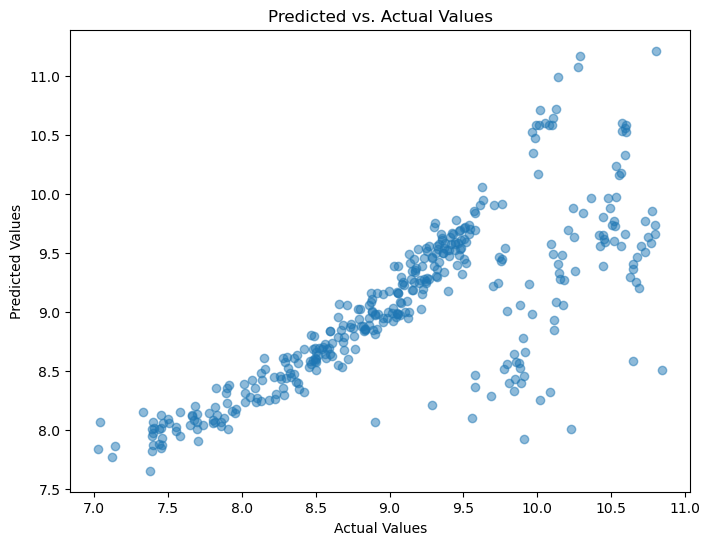

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Comments

1. R square value of about 60 % using log_claim as the target variable
2. The model is not very accurate as the predicted values are away from the actual
3. Tried eliminating multi collinearity but that didn't imporve the accuracy, rather worsened it
4. Adjusted r square is also not looking promising - 59%

I am guessing probably dropping rows with missing values in blood pressure under represented the data.
Hopefully future lessons will equip me with knowledge and skills to improve this model